## Example 

This notebook is to understand the flow of the code and understand what is the input and output during the training process and inference process.

### Visualizing the input data

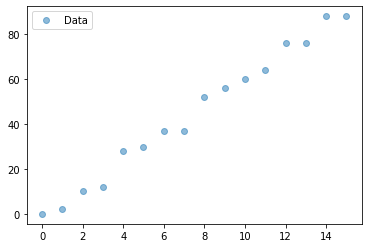

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
from sklearn.linear_model import LinearRegression

y_train = np.array([0,0.5,2.5,3,7,7.5,9.25,9.25,13,14,15,16,19,19,22,22])
y_train = y_train*4

x_train = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

plt.clf()
plt.plot(x_train, y_train, 'o', label='Data', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Trained a Neural Network and the Model Output is as shown 

Here the model parameters will also be written to a file. Consider m1 down below to be a trained model for layer-1. }

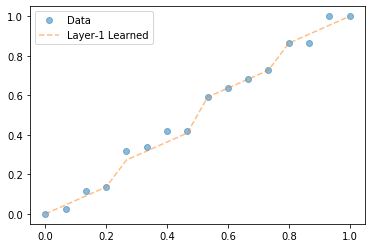

In [2]:
m1 = np.array([0,1,2,3,6,7,8,9,13,14,15,16,19,20,21,22])
m1 = m1*4

y_max = np.max(y_train)
x_max = np.max(x_train)

x_train = x_train/x_max
y_train = y_train/y_max
m1 = m1/y_max

plt.clf()
plt.plot(x_train, y_train, 'o', label='Data', alpha=0.5)
plt.plot(x_train, m1, '--', label='Layer-1 Learned', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Divide the data into multiple chunks

In [3]:
total_buckets = 4
m1_b = np.clip(np.floor(m1*4), 0, total_buckets - 1)

In [4]:
m1_b

array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [5]:
bucket_0 = [x_train[0:4], y_train[0:4]]
bucket_1 = [x_train[4:8], y_train[4:8]]
bucket_2 = [x_train[8:12], y_train[8:12]]
bucket_3 = [x_train[12:16], y_train[12:16]]

### Training Linear Regression on each Bucket

For each bucket we will write the min error, max error, Model coefficient and model intercept to the file which is going to be used during inference. 


### Bucket 0 

Linear Regression Params:  0.7500000000000001 -0.006818181818181834
Min Error:  -1.7999999999999994
Max Error:  1.7999999999999994


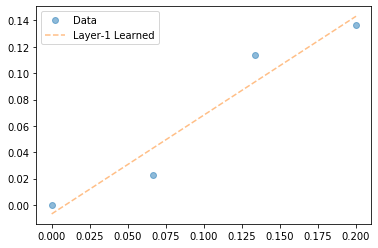

In [6]:
regressor = LinearRegression(n_jobs=-1)
regressor.fit(bucket_0[0].reshape(-1,1), bucket_0[1].reshape(-1,1))
op = regressor.predict(bucket_0[0].reshape(-1,1))
difference = np.subtract(bucket_0[1].reshape(-1,1), op)
min_error = np.min(difference)*y_max
max_error = np.max(difference)*y_max

print("Linear Regression Params: ",regressor.coef_[0][0], regressor.intercept_[0])
print("Min Error: ", min_error)
print("Max Error: ", max_error)

plt.clf()
plt.plot(bucket_0[0].reshape(-1,1), bucket_0[1].reshape(-1,1), 'o', label='Data', alpha=0.5)
plt.plot(bucket_0[0].reshape(-1,1), op, '--', label='Layer-1 Learned', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Bucket 1

Linear Regression Params:  0.5795454545454546 0.16249999999999998
Min Error:  -1.2999999999999998
Max Error:  2.300000000000004


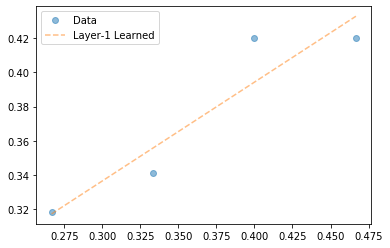

In [7]:
regressor.fit(bucket_1[0].reshape(-1,1), bucket_1[1].reshape(-1,1))
op = regressor.predict(bucket_1[0].reshape(-1,1))
difference = np.subtract(bucket_1[1].reshape(-1,1), op)
min_error = np.min(difference)*y_max
max_error = np.max(difference)*y_max

print("Linear Regression Params: ",regressor.coef_[0][0], regressor.intercept_[0])
print("Min Error: ", min_error)
print("Max Error: ", max_error)

plt.clf()
plt.plot(bucket_1[0].reshape(-1,1), bucket_1[1].reshape(-1,1), 'o', label='Data', alpha=0.5)
plt.plot(bucket_1[0].reshape(-1,1), op, '--', label='Layer-1 Learned', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Bucket 2

Linear Regression Params:  0.681818181818182 0.22727272727272724
Min Error:  -9.769962616701378e-15
Max Error:  0.0


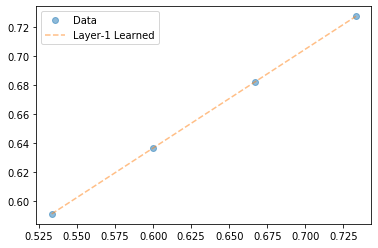

In [8]:
regressor.fit(bucket_2[0].reshape(-1,1), bucket_2[1].reshape(-1,1))
op = regressor.predict(bucket_2[0].reshape(-1,1))
difference = np.subtract(bucket_2[1].reshape(-1,1), op)
min_error = np.min(difference)*y_max
max_error = np.max(difference)*y_max

print("Linear Regression Params: ",regressor.coef_[0][0], regressor.intercept_[0])
print("Min Error: ", min_error)
print("Max Error: ", max_error)

plt.clf()
plt.plot(bucket_2[0].reshape(-1,1), bucket_2[1].reshape(-1,1), 'o', label='Data', alpha=0.5)
plt.plot(bucket_2[0].reshape(-1,1), op, '--', label='Layer-1 Learned', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Bucket 3

Linear Regression Params:  0.8181818181818185 0.19545454545454521
Min Error:  -3.5999999999999988
Max Error:  3.5999999999999988


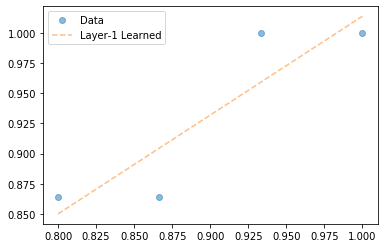

In [9]:
regressor.fit(bucket_3[0].reshape(-1,1), bucket_3[1].reshape(-1,1))
op = regressor.predict(bucket_3[0].reshape(-1,1))
difference = np.subtract(bucket_3[1].reshape(-1,1), op)
min_error = np.min(difference)*y_max
max_error = np.max(difference)*y_max

print("Linear Regression Params: ",regressor.coef_[0][0], regressor.intercept_[0])
print("Min Error: ", min_error)
print("Max Error: ", max_error)

plt.clf()
plt.plot(bucket_3[0].reshape(-1,1), bucket_3[1].reshape(-1,1), 'o', label='Data', alpha=0.5)
plt.plot(bucket_3[0].reshape(-1,1), op, '--', label='Layer-1 Learned', alpha=0.5)
plt.legend(loc='best')
plt.show()

### During Inference

#### Input Key is 5, Output expected in 30 

#### Passing the value through layer-1:

In [10]:
m1[5]

0.3181818181818182

#### Finding which bucket the value lies in 

In [11]:
np.clip(np.floor(m1[5]*4), 0, 3)

1.0

#### Using Linear Regresssion Coff and intercept for approximate prediction

In [12]:
lin_reg_out = 0.5795454545454546*x_train[5] + 0.16249999999999998

#### Scaling the output back

In [13]:
lin_reg_out *= y_max

In [14]:
lin_reg_out

31.299999999999997

#### Min Error for Bucket 1
 Min Error:  -1.2999999999999998
 
 Max Error:  2.300000000000004
 
 Perform binary Search in the range of 30 to 33.6
 Value found at 30 i.e. the expected index